# Introduction 
Social Networks can serve a useful role in complex legal mattes such as the cause surrounding Murdock(murder and fraud) or the bankruptcy of Tom Girardi. These legal findings involve a myriad of stakeholders with varying interests. Moreover the justice system needs to exercise caution in understanding the requirements of these stakeholders to ensure that they are adequately compensated if/when a ruling is made in their favour. This is particularly the cause where means of compensation are limited such as in the case of bankruptcy. 

Subsequently, using a fictional case study, this project will assess how a network could be used. This study will be based upon the novel, The Appeal. For those unaware of this book, its blurb is as follows: 
>  *“In a town full of secrets... Someone was murdered. Someone went to prison. And everyone's a suspect. Can you uncover the truth?
> Dear Reader - enclosed are all the documents you need to solve a case. It starts with the arrival of two mysterious newcomers to the small town of Lockwood, and ends with a tragic death. Someone has already been convicted of this brutal murder and is currently in prison, but we suspect they are innocent. What's more, we believe far darker secrets have yet to be revealed.
> Throughout the Fairway Players' staging of All My Sons and the charity appeal for little Poppy Reswick's life-saving medical treatment, the murderer hid in plain sight. Yet we believe they gave themselves away. In writing. The evidence is all here, between the lines, waiting to be discovered. Will you accept the challenge? Can you uncover the truth?
> The standout debut thriller of 2021 that delivers multiple brilliant twists, and will change the way you think about the modern crime novel.”*
   [(Waterstones, 2022)](https://www.waterstones.com/book/the-appeal/janice-hallett/9781788165303)

*Author’s notes: For ease, some of the information required for this project were collected in a google sheet. Others will be coded manually. *

# Overview
There are several networks which can be used to highlight the relations of those involved in this case. This includes those which highlight the relationship between parties as well as the number of correspondence directed towards one to another. In real life, these networks can hold information about how much money is owed to a party and the nature of the interaction such as victims, parties of interest or family. 

In addition, there are also parties involved in a case with no/limited interest in the case. For example, the legal aids assessing the case to law enforcers who arrested, investigated and charged the suspect. In the case of The Appeal, these include the 3 individuals, Roderick Tanner, Charlotte Holroyd, Olufemi Hassan. Their network is as follows.


In [1]:
# import library for interactive graphs
!pip install pyvis

# import main libraries
import networkx as nx # for structuring networks
import matplotlib.pyplot as plt # for visualisation and customisation
from networkx.algorithms import bipartite

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# library for importing data (kaggle specific)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# import alternative libaray for drawing networks
from pyvis.network import Network

# graph creating function. function from  https://transport-systems.imperial.ac.uk/tf/60008_21/n2_2_weighted_and_directed_graphs.html
def show_wgraph(graph, edge_attr):
    plt.figure(figsize = (20,10))    
    pos = nx.spring_layout(graph)
    weight_labels = nx.get_edge_attributes(graph,edge_attr)
    nx.draw(graph,pos,font_color = 'black',font_size = 18, node_shape = 'o', with_labels = True,)
    output = nx.draw_networkx_edge_labels(graph,pos,edge_labels=weight_labels, font_size = 14)
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.8/592.8 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=4f7d17afc3deb0f8c6cf46c5fe584ec54aefd42b07b8a209963dff574b41dbe5
  Stored in directory: /root/.cache/pip/wheels/57/74/32/e404e0d76fbb2dc4e3791b821cfae6a69c1a6677ded99dc8b7
Successfully built pyvis
/kaggle/input/the-appeal-janice-hallett/The appeal - Sheet3.csv
/kaggle/input/the-appeal-janice-hallett/The appeal - Sheet1.csv
/kaggle/input/the-appeal-janice-hallett/The appeal timeline - Sheet1.csv


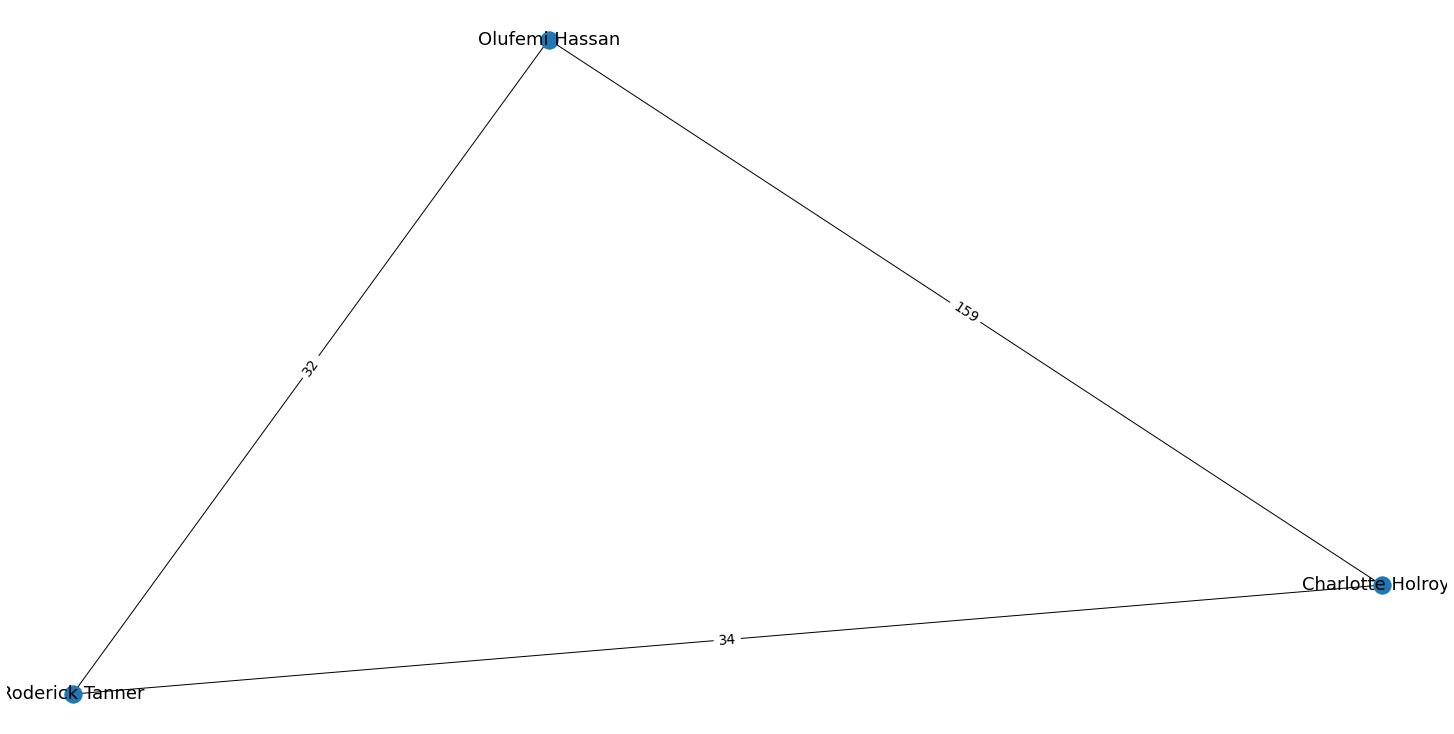

In [2]:
# import data
df= pd.read_csv("/kaggle/input/the-appeal-janice-hallett/The appeal - Sheet3.csv")

# single out key information
legal = df[(df["From"]=="Roderick Tanner")|(df["From"]=="Charlotte Holroyd")|(df["From"]=="Olufemi Hassan")]

# group data
legal = legal.groupby(['From', 'To/CC'], sort= False, as_index = False).sum('Number of messages sent',)
legal['Number of messages sent'] = legal['Number of messages sent'].astype(int)

# create graph
legal = nx.from_pandas_edgelist(legal, source = "From", target = 'To/CC', edge_attr = 'Number of messages sent', create_using = nx.Graph())
show_wgraph(legal, 'Number of messages sent')

These individuals as well as organisations can be excluded from the main networks. The removal organisation relates to the issue that including it distorts the network. Theoretically, an email sent to a group email would have been received by those in the group. As such, depending on the contents should be either removed or assigned to those who would have received the information as a result of such a correspondence. 

# Relationship network 
The first network which can illustrate the connection between parties in the case, is one which highlights the relationships: family, friends, colleagues. These are symmetric relationships for the purpose of this project but it may be a directed multigraph where relationships are more complex. For example, the relationship between Isabel and Samantha could be depicted as a friend but also as a stalker. 

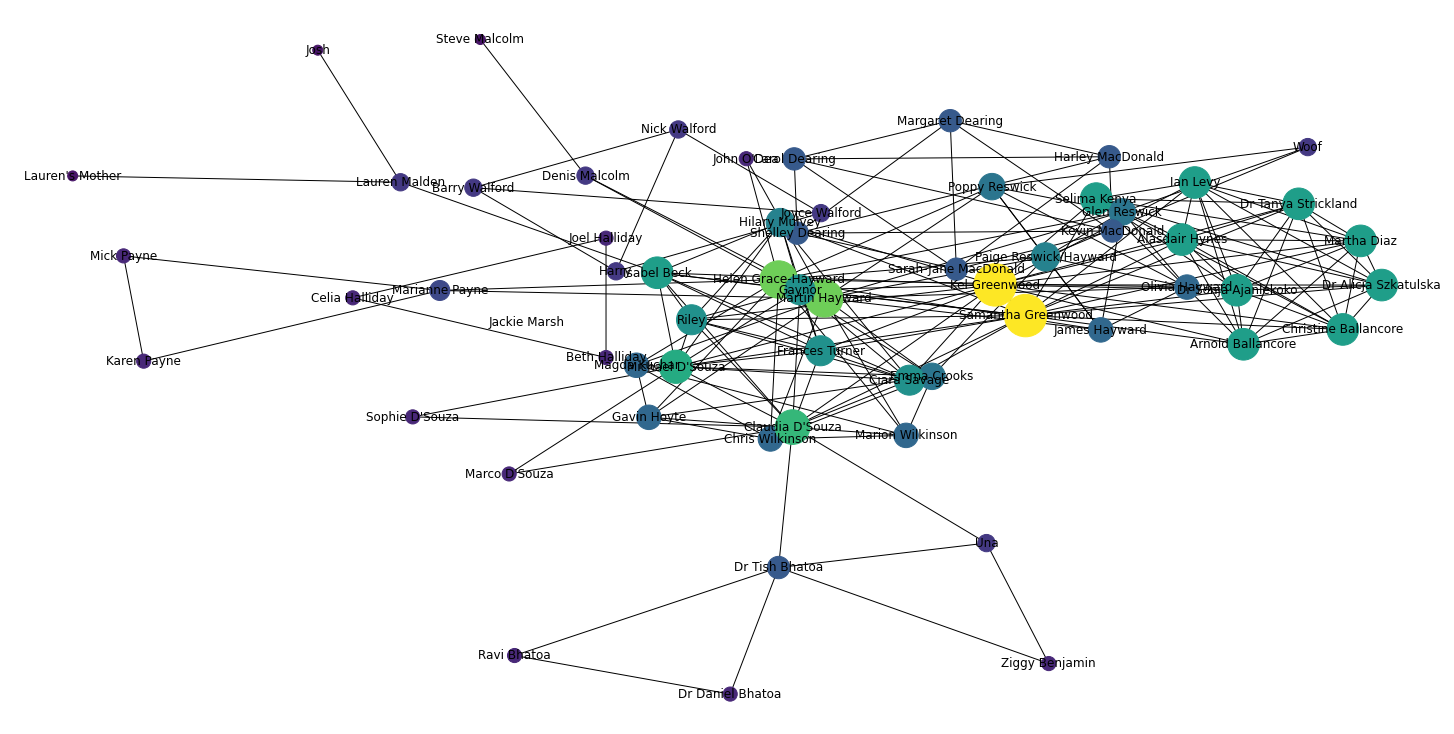

In [3]:
# create network
Bonds = nx.Graph()

# establish nodes/ individuals
Bonds.add_node("Martin Hayward", age = 59, status = "suspect")
Bonds.add_node("Helen Grace-Hayward", age = 62, status = "other")
Bonds.add_node("James Hayward", age = 36, status = "suspect",)
Bonds.add_node("Olivia Hayward", age = 33, status = "other",)
Bonds.add_node("Paige Reswick/Hayward", age = 33, status = "other",)
Bonds.add_node("Glen Reswick", age = 31, status = "other",)
Bonds.add_node("Woof" , age = 3, status = "other",)
Bonds.add_node("Poppy Reswick", age = 2, status = "other",)
Bonds.add_node("Sarah-Jane MacDonald", age = 34, status = "other",)
Bonds.add_node("Kevin MacDonald", age = 37, status = "other",)
Bonds.add_node("Harley MacDonald", age = 10, status = "other")
Bonds.add_node("Margaret Dearing", age = 88, status = "other",)
Bonds.add_node("Carol Dearing", age = 61, status = "other",)
Bonds.add_node("Shelley Dearing", age = 30, status = "other",)
Bonds.add_node("Isabel Beck", age = 29, status = "suspect",)
Bonds.add_node("Lauren Malden", age = 29, status = "other",)
Bonds.add_node("Josh", age = 30, status = "other")
Bonds.add_node("Lauren's Mother", age = 57, status = "other",)
Bonds.add_node("Kel Greenwood", age = 34, status = "other",)
Bonds.add_node("Samantha Greenwood", age = 34, status = "Victum",)
Bonds.add_node("Joyce Walford", age = 63, status = "other",)
Bonds.add_node("Nick Walford", age = 33, status = "other",)
Bonds.add_node("Barry Walford", age = 28, status = "other",)
Bonds.add_node( "Harry", age = 62, status = "other",)
Bonds.add_node("John O'Dea", age = 56, status = "other",)
Bonds.add_node("Denis Malcolm", age = 59, status = "other",)
Bonds.add_node("Steve Malcolm", age = 60, status = "other",)
Bonds.add_node("Marianne Payne", age = 48, status = "other",)
Bonds.add_node("Mick Payne", age = 51, status = "other",)
Bonds.add_node("Karen Payne", age = 26, status = "other",)
Bonds.add_node("Joel Halliday", age = 54, status = "other",)
Bonds.add_node("Celia Halliday", age = 55, status = "other",)
Bonds.add_node("Beth Halliday", age = 16, status = "other",)
Bonds.add_node("Jackie Marsh", age = 23, status = "other",)
Bonds.add_node("Magda Kuchar", age = 24, status = "other",)
Bonds.add_node("Emma Crooks", age = 32, status = "other",)
Bonds.add_node("Gavin Hoyte", age = 30, status = "other",)
Bonds.add_node("Chris Wilkinson", age = 68, status = "other",)
Bonds.add_node("Marion Wilkinson", age = 67, status = "other")
Bonds.add_node("Frances Turner", age = 39, status = "other",)
Bonds.add_node("Gaynor", age = 27, status = "other",)
Bonds.add_node("Riley", age = 25, status = "other",)
Bonds.add_node("Claudia D'Souza", age = 36, status = "other",)
Bonds.add_node("Michael D'Souza", age = 37, status = "other")
Bonds.add_node("Sophie D'Souza", age = 11, status = "other",)
Bonds.add_node("Marco D'Souza", age = 9, status = "other",)
Bonds.add_node("Hilary Mulvey", age = 26, status = "other",)
Bonds.add_node("Ciara Savage", age = 40, status = "other",)
Bonds.add_node("Dr Tish Bhatoa", age = 51, status = "other",)
Bonds.add_node("Ravi Bhatoa", age = 53, status = "other",)
Bonds.add_node("Dr Daniel Bhatoa", age = 43, status = "other",)
Bonds.add_node("Ziggy Benjamin", age = 39, status = "other",)
Bonds.add_node("Una", age = 32, status = "other",)
Bonds.add_node("Dr Sonja Ajanlekoko", age = 34, status = "other",)
Bonds.add_node("Arnold Ballancore", age = 33, status = "other",)
Bonds.add_node("Christine Ballancore", age = 64, status = "other",)
Bonds.add_node("Dr Alicja Szkatulska", age = 37, status = "other",)
Bonds.add_node("Martha Diaz", age = 35, status = "other",)
Bonds.add_node("Dr Tanya Strickland", age = 34, status = "other",)
Bonds.add_node("Ian Levy", age = 39, status = "other",)
Bonds.add_node("Selima Kenya", age = 27, status = "other",)
Bonds.add_node("Alasdair Hynes", age = 47, status = "other",)

# join nodes/individuals
Bonds.add_edge("Martin Hayward", "Helen Grace-Hayward", relationship = "Family")
Bonds.add_edge("Martin Hayward","James Hayward", relationship = "Family")
Bonds.add_edge("Helen Grace-Hayward","James Hayward" , relationship = "Family")
Bonds.add_edge("Martin Hayward","John O'Dea", relationship = "Colleague")
Bonds.add_edge("Helen Grace-Hayward","John O'Dea" , relationship = "Colleague")
Bonds.add_edge("Martin Hayward","Denis Malcolm", relationship = "Colleague")
Bonds.add_edge("Helen Grace-Hayward","Denis Malcolm" , relationship = "Colleague")
Bonds.add_edge("Martin Hayward","Marianne Payne", relationship = "Colleague")
Bonds.add_edge("Helen Grace-Hayward","Marianne Payne", relationship = "Colleague")
Bonds.add_edge("Martin Hayward","Olivia Hayward", relationship = "Family")
Bonds.add_edge("Helen Grace-Hayward","Olivia Hayward", relationship = "Family")
Bonds.add_edge("James Hayward","Olivia Hayward", relationship = "Family")
Bonds.add_edge("Martin Hayward","Paige Reswick/Hayward", relationship = "Family")
Bonds.add_edge("Helen Grace-Hayward","Paige Reswick/Hayward", relationship = "Family")
Bonds.add_edge("James Hayward","Paige Reswick/Hayward", relationship = "Family")
Bonds.add_edge("Olivia Hayward","Paige Reswick/Hayward" , relationship = "Family")
Bonds.add_edge("Martin Hayward","Glen Reswick", relationship = "Family")
Bonds.add_edge("Helen Grace-Hayward","Glen Reswick", relationship = "Family")
Bonds.add_edge("James Hayward","Glen Reswick" , relationship = "Family")
Bonds.add_edge("Olivia Hayward","Glen Reswick", relationship = "Family")
Bonds.add_edge("Paige Reswick/Hayward","Glen Reswick" , relationship = "Family")
Bonds.add_edge("Poppy Reswick","Glen Reswick" , relationship = "Family")
Bonds.add_edge("Martin Hayward","Poppy Reswick", relationship = "Family")
Bonds.add_edge("Helen Grace-Hayward","Poppy Reswick", relationship = "Family")
Bonds.add_edge("James Hayward","Poppy Reswick" , relationship = "Family")
Bonds.add_edge("Olivia Hayward","Poppy Reswick", relationship = "Family")
Bonds.add_edge("Paige Reswick/Hayward","Poppy Reswick" , relationship = "Family")
Bonds.add_edge("Paige Reswick/Hayward","Woof", relationship = "Family")
Bonds.add_edge("Poppy Reswick","Woof", relationship = "Family")
Bonds.add_edge("Glen Reswick","Woof", relationship = "Family")
Bonds.add_edge("Sarah-Jane MacDonald", "Kevin MacDonald", relationship = "Family")
Bonds.add_edge("Sarah-Jane MacDonald", "Harley MacDonald", relationship = "Family")
Bonds.add_edge("Harley MacDonald", "Kevin MacDonald", relationship = "Family")
Bonds.add_edge("Sarah-Jane MacDonald", "Carol Dearing", relationship = "Family")
Bonds.add_edge("Carol Dearing", "Harley MacDonald", relationship = "Family")
Bonds.add_edge("Carol Dearing", "Kevin MacDonald", relationship = "Family")
Bonds.add_edge("Sarah-Jane MacDonald", "Margaret Dearing", relationship = "Family")
Bonds.add_edge("Margaret Dearing", "Harley MacDonald", relationship = "Family")
Bonds.add_edge("Margaret Dearing", "Kevin MacDonald", relationship = "Family")
Bonds.add_edge("Margaret Dearing", "Carol Dearing", relationship = "Family")
Bonds.add_edge("Sarah-Jane MacDonald", "Shelley Dearing", relationship = "Family")
Bonds.add_edge("Shelley Dearing", "Harley MacDonald", relationship = "Family")
Bonds.add_edge("Shelley Dearing", "Kevin MacDonald", relationship = "Family")
Bonds.add_edge("Margaret Dearing", "Shelley Dearing", relationship = "Family")
Bonds.add_edge("Shelley Dearing", "Carol Dearing", relationship = "Family")
Bonds.add_edge("Lauren Malden","Isabel Beck", relationship = "Friends")
Bonds.add_edge("Lauren Malden","Josh", relationship = "Family")
Bonds.add_edge("Lauren Malden","Lauren's Mother", relationship = "Family")
Bonds.add_edge("Kel Greenwood", "Samantha Greenwood", relationship = "Family")
Bonds.add_edge("Joyce Walford", "Nick Walford", relationship = "Family")
Bonds.add_edge("Joyce Walford", "Barry Walford", relationship = "Family")
Bonds.add_edge("Nick Walford", "Barry Walford", relationship = "Family")
Bonds.add_edge("Joyce Walford", "Harry", relationship = "Family")
Bonds.add_edge("Nick Walford", "Harry", relationship = "Family")
Bonds.add_edge("Barry Walford", "Harry", relationship = "Family")
Bonds.add_edge("Denis Malcolm", "Steve Malcolm", relationship = "Family")
Bonds.add_edge("Marianne Payne", "Mick Payne", relationship = "Family")
Bonds.add_edge("Marianne Payne", "Karen Payne", relationship = "Family")
Bonds.add_edge("Karen Payne", "Mick Payne", relationship = "Family")
Bonds.add_edge("Joel Halliday", "Celia Halliday", relationship = "Family")
Bonds.add_edge("Beth Halliday", "Celia Halliday", relationship = "Family")
Bonds.add_edge("Beth Halliday", "Joel Halliday", relationship = "Family")
Bonds.add_edge("Chris Wilkinson", "Marion Wilkinson", relationship = "Family")
Bonds.add_edge("Martin Hayward", "Chris Wilkinson", relationship = "Employer")
Bonds.add_edge("Martin Hayward", "Marion Wilkinson", relationship = "Employer")
Bonds.add_edge("Helen Grace-Hayward", "Chris Wilkinson", relationship = "Employer")
Bonds.add_edge("Helen Grace-Hayward", "Marion Wilkinson", relationship = "Employer")
Bonds.add_edge("Martin Hayward", "Magda Kuchar", relationship = "Employer")
Bonds.add_edge("Helen Grace-Hayward", "Magda Kuchar", relationship = "Employer")
Bonds.add_edge("Martin Hayward", "Emma Crooks", relationship = "Employer")
Bonds.add_edge("Helen Grace-Hayward", "Emma Crooks", relationship = "Employer")
Bonds.add_edge("Paige Reswick/Hayward", "Emma Crooks", relationship = "Friends")
Bonds.add_edge("Martin Hayward", "Gavin Hoyte", relationship = "Employer")
Bonds.add_edge("Helen Grace-Hayward", "Gavin Hoyte", relationship = "Employer")
Bonds.add_edge("Magda Kuchar", "Chris Wilkinson", relationship = "Colleague")
Bonds.add_edge("Magda Kuchar", "Marion Wilkinson", relationship = "Colleague")
Bonds.add_edge("Emma Crooks", "Chris Wilkinson", relationship = "Colleague")
Bonds.add_edge("Emma Crooks", "Marion Wilkinson", relationship = "Colleague")
Bonds.add_edge("Gavin Hoyte", "Chris Wilkinson", relationship = "Colleague")
Bonds.add_edge("Gavin Hoyte", "Marion Wilkinson", relationship = "Colleague")
Bonds.add_edge("Emma Crooks", "Magda Kuchar", relationship = "Colleague")
Bonds.add_edge("Gavin Hoyte", "Magda Kuchar", relationship = "Colleague")
Bonds.add_edge("Emma Crooks", "Gavin Hoyte", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Riley", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Riley", relationship = "Colleague")
Bonds.add_edge("Claudia D'Souza", "Michael D'Souza", relationship = "Family")
Bonds.add_edge("Claudia D'Souza", "Sophie D'Souza", relationship = "Family")
Bonds.add_edge("Sophie D'Souza", "Michael D'Souza", relationship = "Family")
Bonds.add_edge("Claudia D'Souza", "Marco D'Souza", relationship = "Family")
Bonds.add_edge("Marco D'Souza", "Michael D'Souza", relationship = "Family")
Bonds.add_edge("Sophie D'Souza", "Michael D'Souza", relationship = "Family")
Bonds.add_edge("Frances Turner", "Claudia D'Souza", relationship = "Colleague")
Bonds.add_edge("Claudia D'Souza", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Claudia D'Souza", "Riley", relationship = "Colleague")
Bonds.add_edge("Claudia D'Souza", "Kel Greenwood", relationship = "Lovers")
Bonds.add_edge("Claudia D'Souza", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Michael D'Souza", relationship = "Colleague")
Bonds.add_edge("Michael D'Souza", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Michael D'Souza", "Riley", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Hilary Mulvey", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Riley", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Michael D'Souza", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Ciara Savage", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Ciara Savage", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Gaynor", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Riley", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Michael D'Souza", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Claudia D'Souza", relationship = "Colleague")
Bonds.add_edge("Dr Tish Bhatoa", "Una", relationship = "Colleague")
Bonds.add_edge("Ziggy Benjamin", "Una", relationship = "Colleague")
Bonds.add_edge("Dr Tish Bhatoa", "Ziggy Benjamin", relationship = "Colleague")
Bonds.add_edge("Dr Tish Bhatoa", "Ravi Bhatoa", relationship = "Family")
Bonds.add_edge("Ravi Bhatoa", "Dr Daniel Bhatoa", relationship = "Family")
Bonds.add_edge("Dr Tish Bhatoa", "Dr Daniel Bhatoa", relationship = "Family")
Bonds.add_edge("Dr Tish Bhatoa", "Claudia D'Souza", relationship = "Colleague")
Bonds.add_edge("Dr Tish Bhatoa", "Claudia D'Souza", relationship = "Colleague")
Bonds.add_edge("Una", "Claudia D'Souza", relationship = "Friends")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Arnold Ballancore", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Christine Ballancore", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Christine Ballancore", relationship = "Family")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Dr Tanya Strickland", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Dr Tanya Strickland", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Dr Tanya Strickland", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Alasdair Hynes", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Alasdair Hynes", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Martha Diaz", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Martha Diaz", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Martha Diaz", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Ian Levy", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Ian Levy", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Ian Levy", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Ian Levy", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Selima Kenya", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Selima Kenya", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Selima Kenya", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Selima Kenya", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Isabel Beck", relationship = "Suspected onsided Friendship")
Bonds.add_edge("Frances Turner", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Gaynor", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Riley", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Claudia D'Souza", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Michael D'Souza", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Isabel Beck", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Gaynor", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Riley", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Michael D'Souza", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Frances Turner", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Gaynor", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Riley", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Michael D'Souza", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Hilary Mulvey", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Ciara Savage", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Samantha Greenwood", "Ian Levy", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Samantha Greenwood", relationship = "Colleague")
Bonds.add_edge("Dr Sonja Ajanlekoko", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Arnold Ballancore", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Christine Ballancore", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Dr Alicja Szkatulska", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Alasdair Hynes", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Martha Diaz", relationship = "Colleague")
Bonds.add_edge("Dr Tanya Strickland", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Selima Kenya", "Kel Greenwood", relationship = "Colleague")
Bonds.add_edge("Kel Greenwood", "Ian Levy", relationship = "Colleague")


# create graph
plt.figure(figsize = (20,10))
pos = nx.kamada_kawai_layout(Bonds)

node_color = [Bonds.degree(v) for v in Bonds]
node_degree = dict(Bonds.degree)

nx.draw(Bonds, with_labels = True, node_size = [v * 100 for v in node_degree.values()] , node_color=node_color, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [4]:
# create interaxtive graph
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color= "white", )

color=nx.get_node_attributes(Bonds,'status')
nx.set_node_attributes(Bonds,color, "group")

net.from_nx(Bonds)
net.show("xx.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Based on this network the legal researcher can investigate the relationships between two individuals. For example, Samantha and Dr Szkatulska are colleagues. 

In [5]:
Bonds.get_edge_data("Samantha Greenwood","Dr Alicja Szkatulska",)["relationship"]

'Colleague'

In [6]:
nx.average_clustering(Bonds)

0.8119769593678511

This network has a clustering of 0.8 and for Samantha in specific, based on her relationships, her local clustering coefficient is 0.52. 

In [7]:
nx.clustering(Bonds, "Samantha Greenwood")

0.5228758169934641

For reference, transitivity is slightly low at 0.76 as individuals with a high number of connections such as Martin Hayward impacts the score. 

In [8]:
nx.transitivity(Bonds)

0.7603414313854235

# Network and organisations 

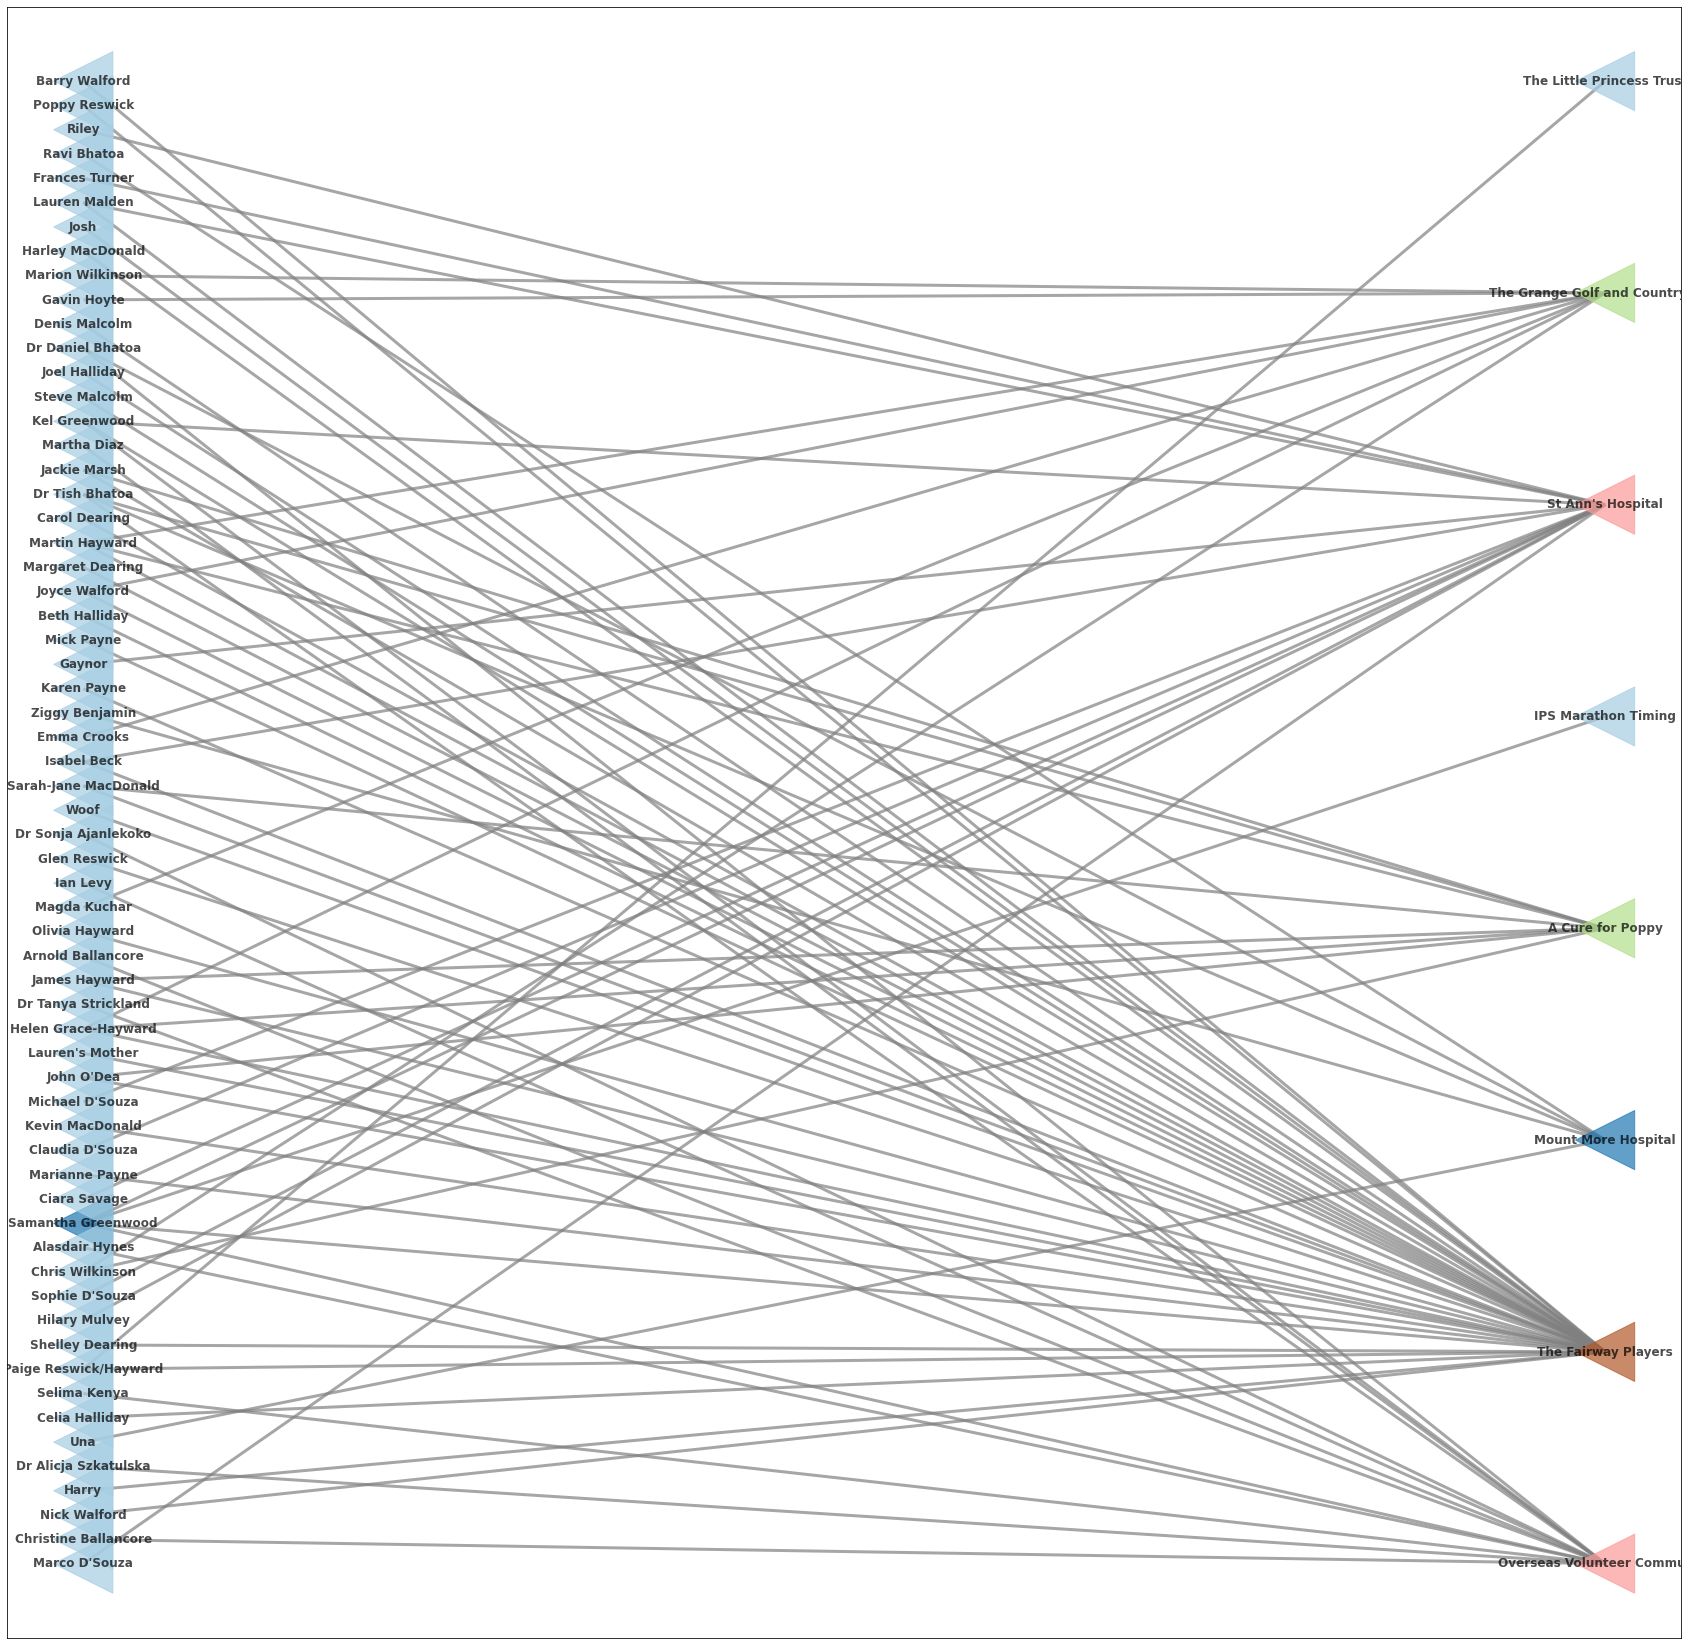

In [9]:
# create graph
individuals = nx.Graph()

# establish nodes/individuals 
individuals.add_node("Martin Hayward", age = 59, status = "suspect",bipartite=0)
individuals.add_node("Helen Grace-Hayward", age = 62, status = "other",bipartite=0)
individuals.add_node("James Hayward", age = 36, status = "suspect",bipartite=0)
individuals.add_node("Olivia Hayward", age = 33, status = "other",bipartite=0)
individuals.add_node("Paige Reswick/Hayward", age = 33, status = "other",bipartite=0)
individuals.add_node("Glen Reswick", age = 31, status = "other",bipartite=0)
individuals.add_node("Woof" , age = 3, status = "other",bipartite=0)
individuals.add_node("Poppy Reswick", age = 2, status = "other",bipartite=0)
individuals.add_node("Sarah-Jane MacDonald", age = 34, status = "other",bipartite=0)
individuals.add_node("Kevin MacDonald", age = 37, status = "other",bipartite=0)
individuals.add_node("Harley MacDonald", age = 10, status = "other",bipartite=0)
individuals.add_node("Margaret Dearing", age = 88, status = "other",bipartite=0)
individuals.add_node("Carol Dearing", age = 61, status = "other",bipartite=0)
individuals.add_node("Shelley Dearing", age = 30, status = "other",bipartite=0)
individuals.add_node("Isabel Beck", age = 29, status = "suspect",bipartite=0)
individuals.add_node("Lauren Malden", age = 29, status = "other",bipartite=0)
individuals.add_node("Josh", age = 30, status = "other",bipartite=0)
individuals.add_node("Lauren's Mother", age = 57, status = "other",bipartite=0)
individuals.add_node("Kel Greenwood", age = 34, status = "other",bipartite=0)
individuals.add_node("Samantha Greenwood", age = 34, status = "Victum",bipartite=0)
individuals.add_node("Joyce Walford", age = 63, status = "other",bipartite=0)
individuals.add_node("Nick Walford", age = 33, status = "other",bipartite=0)
individuals.add_node("Barry Walford", age = 28, status = "other",bipartite=0)
individuals.add_node( "Harry", age = 62, status = "other",bipartite=0)
individuals.add_node("John O'Dea", age = 56, status = "other",bipartite=0)
individuals.add_node("Denis Malcolm", age = 59, status = "other",bipartite=0)
individuals.add_node("Steve Malcolm", age = 60, status = "other",bipartite=0)
individuals.add_node("Marianne Payne", age = 48, status = "other",bipartite=0)
individuals.add_node("Mick Payne", age = 51, status = "other",bipartite=0)
individuals.add_node("Karen Payne", age = 26, status = "other",bipartite=0)
individuals.add_node("Joel Halliday", age = 54, status = "other",bipartite=0)
individuals.add_node("Celia Halliday", age = 55, status = "other",bipartite=0)
individuals.add_node("Beth Halliday", age = 16, status = "other",bipartite=0)
individuals.add_node("Jackie Marsh", age = 23, status = "other",bipartite=0)
individuals.add_node("Magda Kuchar", age = 24, status = "other",bipartite=0)
individuals.add_node("Emma Crooks", age = 32, status = "other",bipartite=0)
individuals.add_node("Gavin Hoyte", age = 30, status = "other",bipartite=0)
individuals.add_node("Chris Wilkinson", age = 68, status = "other",bipartite=0)
individuals.add_node("Marion Wilkinson", age = 67, status = "other",bipartite=0)
individuals.add_node("Frances Turner", age = 39, status = "other",bipartite=0)
individuals.add_node("Gaynor", age = 27, status = "other",bipartite=0)
individuals.add_node("Riley", age = 25, status = "other",bipartite=0)
individuals.add_node("Claudia D'Souza", age = 36, status = "other",bipartite=0)
individuals.add_node("Michael D'Souza", age = 37, status = "other",bipartite=0)
individuals.add_node("Sophie D'Souza", age = 11, status = "other",bipartite=0)
individuals.add_node("Marco D'Souza", age = 9, status = "other",bipartite=0)
individuals.add_node("Hilary Mulvey", age = 26, status = "other",bipartite=0)
individuals.add_node("Ciara Savage", age = 40, status = "other",bipartite=0)
individuals.add_node("Dr Tish Bhatoa", age = 51, status = "other",bipartite=0)
individuals.add_node("Ravi Bhatoa", age = 53, status = "other",bipartite=0)
individuals.add_node("Dr Daniel Bhatoa", age = 43, status = "other",bipartite=0)
individuals.add_node("Ziggy Benjamin", age = 39, status = "other",bipartite=0)
individuals.add_node("Una", age = 32, status = "other",bipartite=0)
individuals.add_node("Dr Sonja Ajanlekoko", age = 34, status = "other",bipartite=0)
individuals.add_node("Arnold Ballancore", age = 33, status = "other",bipartite=0)
individuals.add_node("Christine Ballancore", age = 64, status = "other",bipartite=0)
individuals.add_node("Dr Alicja Szkatulska", age = 37, status = "other",bipartite=0)
individuals.add_node("Martha Diaz", age = 35, status = "other",bipartite=0)
individuals.add_node("Dr Tanya Strickland", age = 34, status = "other",bipartite=0)
individuals.add_node("Ian Levy", age = 39, status = "other",bipartite=0)
individuals.add_node("Selima Kenya", age = 27, status = "other",bipartite=0)
individuals.add_node("Alasdair Hynes", age = 47, status = "other",bipartite=0)
individuals.add_node("The Fairway Players",age = np.nan, status = "group",bipartite=1)
individuals.add_node("The Grange Golf and Country Club",age = np.nan, status = "group",bipartite=1)
individuals.add_node("Mount More Hospital",age = np.nan, status = "group",bipartite=1)
individuals.add_node("A Cure for Poppy",age = np.nan, status = "group",bipartite=1)
individuals.add_node("St Ann's Hospital",age = np.nan, status = "group",bipartite=1)
individuals.add_node("The Little Princess Trust",age = np.nan, status = "group",bipartite=1)
individuals.add_node("Overseas Volunteer Community",age = np.nan, status = "group",bipartite=1)
individuals.add_node("IPS Marathon Timing",age = np.nan, status = "group",bipartite=1)

# connect nodes/individuals 
individuals.add_edges_from([("Martin Hayward", "The Fairway Players"),("Martin Hayward", "A Cure for Poppy"),("Martin Hayward", "The Grange Golf and Country Club"),
                            ("Helen Grace-Hayward", "The Fairway Players"),("Helen Grace-Hayward", "A Cure for Poppy"),("Helen Grace-Hayward", "The Grange Golf and Country Club"),
                            ("James Hayward", "The Fairway Players"), ("James Hayward","A Cure for Poppy"),
                            ("Olivia Hayward", "The Fairway Players"),
                            ("Paige Reswick/Hayward", "The Fairway Players"), ("Paige Reswick/Hayward","The Little Princess Trust"),
                            ("Glen Reswick", "The Fairway Players"),
                            ("Poppy Reswick", "The Fairway Players"),
                            ("Woof", "The Fairway Players"),
                            ("Sarah-Jane MacDonald" , "The Fairway Players"),("Sarah-Jane MacDonald" , "A Cure for Poppy"),
                            ("Kevin MacDonald", "The Fairway Players"),
                            ("Harley MacDonald", "The Fairway Players"),
                            ("Carol Dearing", "The Fairway Players"),
                            ("Margaret Dearing", "The Fairway Players"),
                            ("Shelley Dearing", "The Fairway Players"),
                            ("Isabel Beck", "The Fairway Players"),   ("Isabel Beck", "St Ann's Hospital"), 
                            ("Lauren Malden", "The Fairway Players"),("Lauren Malden", "St Ann's Hospital"), 
                            ("Josh", "The Fairway Players"),
                            ("Lauren's Mother", "The Fairway Players"),
                            ("Kel Greenwood", "The Fairway Players"),("Kel Greenwood", "St Ann's Hospital"), ("Kel Greenwood", "Overseas Volunteer Community"),
                            ("Samantha Greenwood", "The Fairway Players"),("Samantha Greenwood", "St Ann's Hospital"), ("Samantha Greenwood", "Overseas Volunteer Community"),("Samantha Greenwood","IPS Marathon Timing"),
                            ("Joyce Walford", "The Fairway Players"),("Joyce Walford", "The Grange Golf and Country Club"),
                            ("Nick Walford", "The Fairway Players"),
                            ("Barry Walford", "The Fairway Players"),
                            ("Harry", "The Fairway Players"),
                            ("John O'Dea", "The Fairway Players"),("John O'Dea", "A Cure for Poppy"),
                            ("Denis Malcolm", "The Fairway Players"),
                            ("Steve Malcolm", "The Fairway Players"),
                            ("Marianne Payne", "The Fairway Players"),
                            ("Mick Payne", "The Fairway Players"),
                            ("Karen Payne", "The Fairway Players"),
                            ("Jackie Marsh", "The Fairway Players"),("Jackie Marsh", "A Cure for Poppy"),
                            ("Joel Halliday", "The Fairway Players"),
                            ("Celia Halliday", "The Fairway Players"),
                            ("Beth Halliday", "The Fairway Players"),
                            ("Magda Kuchar","The Grange Golf and Country Club"),
                            ("Emma Crooks","The Grange Golf and Country Club"),
                            ("Chris Wilkinson","The Grange Golf and Country Club"),("Chris Wilkinson","A Cure for Poppy"),
                            ("Marion Wilkinson","The Grange Golf and Country Club"),
                            ("Gavin Hoyte","The Grange Golf and Country Club"),
                            ("Frances Turner","St Ann's Hospital"),
                            ("Gaynor","St Ann's Hospital"),
                            ("Riley","St Ann's Hospital"),
                            ("Claudia D'Souza","St Ann's Hospital"),
                            ("Michael D'Souza","St Ann's Hospital"),
                            ("Sophie D'Souza","St Ann's Hospital"),
                            ("Marco D'Souza","St Ann's Hospital"),
                            ("Hilary Mulvey","St Ann's Hospital"),
                            ("Ciara Savage","St Ann's Hospital"),
                            ("Dr Tish Bhatoa", "Mount More Hospital"),("Dr Tish Bhatoa", "A Cure for Poppy"),("Dr Tish Bhatoa","Overseas Volunteer Community"),
                            ("Ravi Bhatoa", "Mount More Hospital"),
                            ("Dr Daniel Bhatoa","Mount More Hospital"), ("Dr Daniel Bhatoa","Overseas Volunteer Community"),
                            ("Una", "Mount More Hospital"),
                            ("Ziggy Benjamin", "Mount More Hospital"),
                            ("Dr Sonja Ajanlekoko","Overseas Volunteer Community"),
                            ("Arnold Ballancore","Overseas Volunteer Community"),
                            ("Christine Ballancore","Overseas Volunteer Community"),
                            ("Dr Alicja Szkatulska","Overseas Volunteer Community"),
                            ("Alasdair Hynes","Overseas Volunteer Community"),
                            ("Dr Tanya Strickland","Overseas Volunteer Community"),
                            ("Martha Diaz","Overseas Volunteer Community"),
                            ("Ian Levy","Overseas Volunteer Community"),
                            ("Selima Kenya","Overseas Volunteer Community"),
                           ])



# create graph
plt.figure(figsize = (30,30))
top_nodes,bottom_nodes  = bipartite.sets(individuals)


node_color = [individuals.degree(v) for v in individuals]


nx.draw_networkx(individuals,   pos = nx.drawing.layout.bipartite_layout(individuals, top_nodes),node_size=3500, node_color=node_color, alpha=0.7, cmap=plt.cm.Paired,font_size=12,node_shape="<", 
                 font_weight="bold", width=3, font_color='black', edge_color="grey",)


The case also highlights a plethora of groups from those who work at St Ann’s Hospital to those involved in the Fairway Players. Some individuals can be involved in different groups. In real life, outlining such networks can be used to assess if there is a conflict of interest. For example, in the Girardi bankruptcy, as Tom has been involved in law for a long time, it is vital to ensure that parties do not have a conflict. This was best highlighted by Erika Girardi’s attorney filing objections against Ronald Richards for his role in the bankruptcy proceedings. Using a bipartite graph, the relationship can be utilised. 

In [10]:
bipartite.is_bipartite(individuals)

True

This graph can show how via shared links to organisations including their past interactions with the overseas volunteer group, Samantha Greenwood and Dr Tish Bhatoa are connected, with other individuals. Weighting the graph can also highlight the strength of these connections.

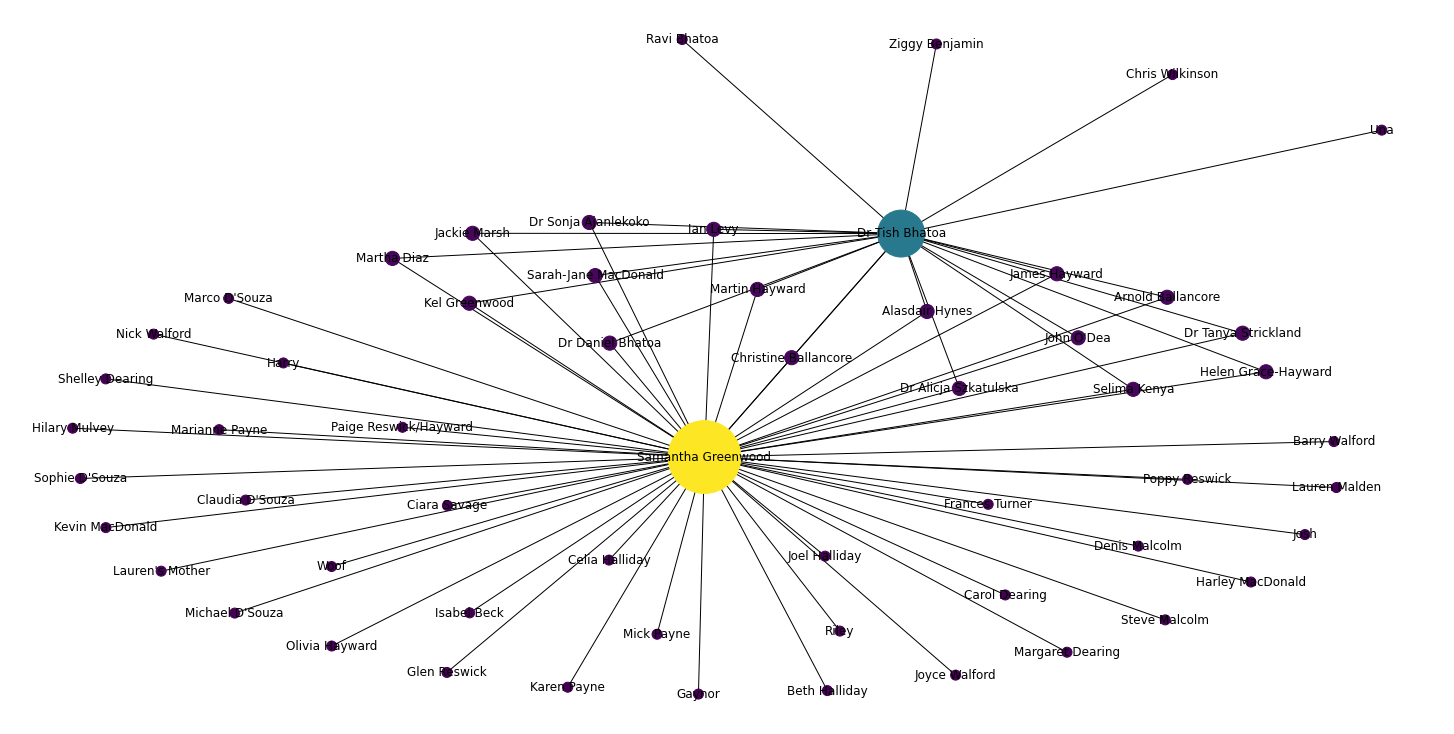

In [11]:
# reshape graph
X = set(["Samantha Greenwood",'Dr Tish Bhatoa'])
P = bipartite.projected_graph(individuals,X )

#create graph
plt.figure(figsize = (20,10))
pos = nx.kamada_kawai_layout(P)

node_color = [P.degree(v) for v in P]
node_degree = dict(P.degree)

nx.draw(P, with_labels = True, node_size = [v * 100 for v in node_degree.values()] , node_color=node_color, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

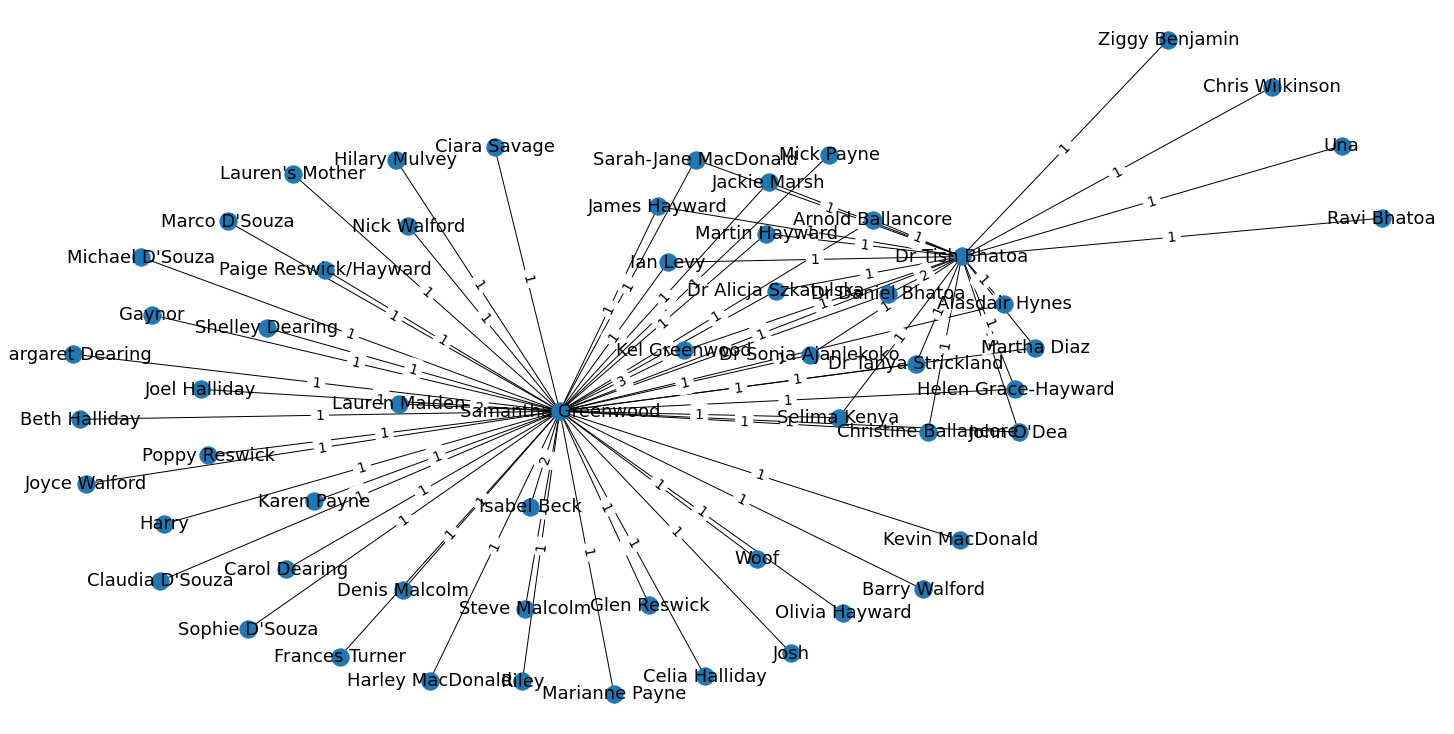

In [12]:
# reshape and creare graph
P = bipartite.weighted_projected_graph(individuals,X )
show_wgraph(P, "weight")

This bipartite network also stores status of individuals such as whether a person is a suspect, victim etc. This once again may be used by the legal team where key information about an individual is needed to be stored and recalled effectively. For example, in the indictment of Jen Shah, with 10 other individuals also arrested, adding information to each node may aid in later reviews of information. 

In [13]:
individuals.nodes["Martin Hayward"]["status"]

'suspect'

Examination of those on the outer periphery of the network may also yield useful information for the investigation and its approach. Those on the boundary are more likely to have limited information about the case and may be more willing to share it due to their weak connection to the key individuals.  In the case of this case study and the bipartite graph, these would include the following individuals. 

In [14]:
nx.periphery(individuals)
# could be dropped from investigation

['Ravi Bhatoa', 'Ziggy Benjamin', 'Una', 'The Little Princess Trust']

In contrast, approaching those in the centre of the network should be done with caution, both in their depth of knowledge about the incident as well as in their links to suspects/ be the suspect. Whilst the network in a legal setting should already have knowledge of key individuals, it can also reveal additional information. For example, in the bipartite network, it has identified that some of the central figures/groups are as follows: 

In [15]:
nx.center(individuals)

['Martin Hayward',
 'Helen Grace-Hayward',
 'James Hayward',
 'Sarah-Jane MacDonald',
 'Kel Greenwood',
 'Samantha Greenwood',
 "John O'Dea",
 'Jackie Marsh']

This list includes not only the victim, Samantha Greenwood but also individuals such as Kel Greenwood and Sarah-Jane MacDonald. These individuals are likely to be suspected of the crime as well as hold key information. In a real life example, the hope is that such a coding would reveal possible staff at Girardi law firm who may have been aware of the poor practices that were taking place.

In [16]:
# create graph
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color= "white")

node_degree = dict(individuals.degree)
nx.set_node_attributes(individuals, node_degree, "size")
#color=nx.get_node_attributes(individuals,'status')
#nx.set_node_attributes(individuals,color, "group")
net.from_nx(individuals)
net.show("xx.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Communication
Examining the actual evidence provided in the case study, there are two forms of networks that could be constructed. 
* Connection between the parties
* Communication between parties

## Connection between parties
If an email or message has been sent to and from two individuals, there is a connection between them. In addition, looking at the collections of messages logged, some responses to such correspondences from the Greenwoods are missing. Therefore this network simply logs if a message has been sent between the parties, irrespective of who sent the message. This creates the following graph. 

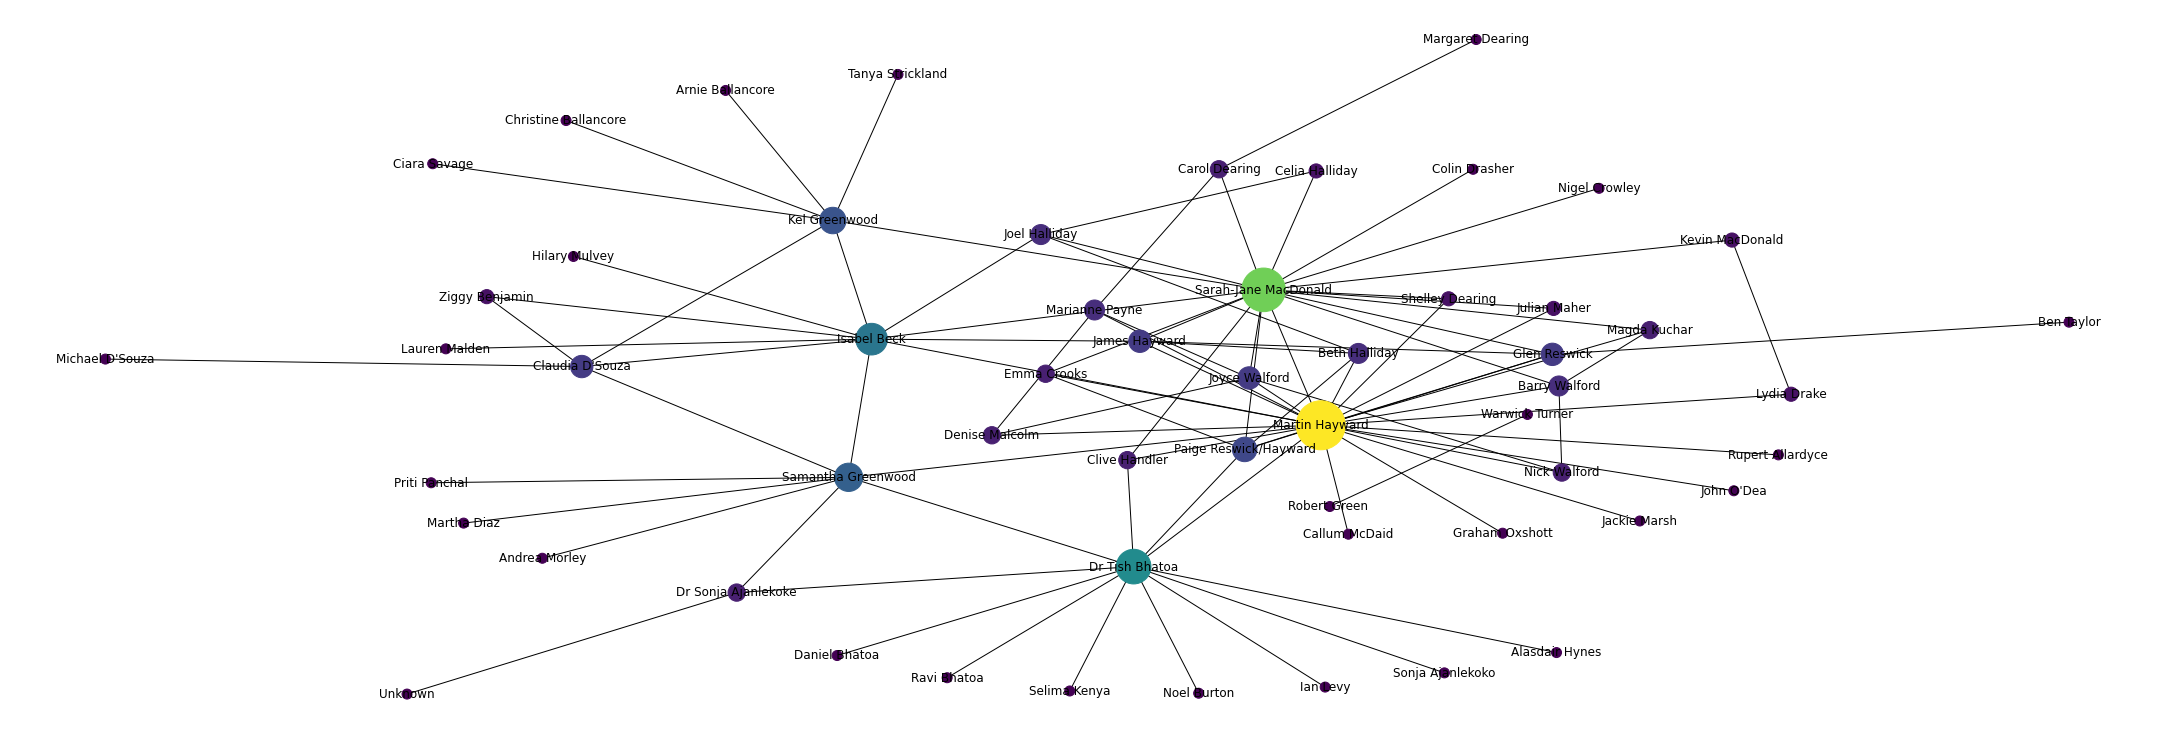

In [17]:
# reshape data
network = df[~df.isin(legal)]
network =network.drop(network[network["Number of messages sent"]==-1].index, axis = 0)
network =network.drop(network[network["To/CC"]=="All My Sons cast and crew"].index, axis = 0)
network =network.drop(network[network["To/CC"]=="A Cure for Poppy"].index, axis = 0)
network =network.drop(network[network["To/CC"]=="A Cure for Poppy Fundraising Committee"].index, axis = 0)

emails =network.copy() 

network.drop("Number of messages sent", axis =1, inplace = True)
network_df = pd.DataFrame(np.sort(network.values, axis = 1), columns = network.columns)

network_df["count"]= 1 
network_df = network_df.groupby(["From", "To/CC"], sort = False, as_index= False).sum()

# cerate network
G = nx.from_pandas_edgelist(network_df, source = "From", target = "To/CC", edge_attr = "count", create_using = nx.Graph())

# cerate graph
plt.figure(figsize = (30,10))
pos = nx.kamada_kawai_layout(G)
node_color = [G.degree(v) for v in G]
node_degree = dict(G.degree)


nx.draw(G, with_labels = True,  node_size = [v * 100 for v in node_degree.values()] , node_color=node_color, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()


Unpacking the stored data, reveals that between Martin Hayward and Dr Tish Bhatoa, there are 35 reported communications between them. 

In [18]:
G.get_edge_data('Martin Hayward', "Dr Tish Bhatoa")

{'count': 35}

In addition, whilst it is implied in the documents that Daniel Bhatoa and Samantha Greenwood share a relationship, in this network the shortest path between them involves Dr Tish Bhatoa and therefore has a length of 2. 

In [19]:
nx.shortest_path(G, "Samantha Greenwood", "Daniel Bhatoa")

['Samantha Greenwood', 'Dr Tish Bhatoa', 'Daniel Bhatoa']

In [20]:
nx.shortest_path_length(G, "Samantha Greenwood", "Daniel Bhatoa")

2

Aspects such as these, and understanding how possible connections can be formed in a network can provide law enforcement with new routes of investigation. For example, if the link between Samantha and Daniel was being investigated, questioning Trish, may provide key information. That said, in this case caution should be exercised as Tish and Daniel are related. 

Focusing on Samantha, the paths connecting her and the other individuals can be described as follows using the Breadth-First search. Once again, aspects such as these may provided a point from which investigations and questioning could take place.  

In [21]:
T = nx.bfs_tree(G, "Samantha Greenwood")
T.edges()

OutEdgeView([('Samantha Greenwood', 'Andrea Morley'), ('Samantha Greenwood', "Claudia D'Souza"), ('Samantha Greenwood', 'Dr Sonja Ajanlekoke'), ('Samantha Greenwood', 'Dr Tish Bhatoa'), ('Samantha Greenwood', 'Isabel Beck'), ('Samantha Greenwood', 'Martha Diaz'), ('Samantha Greenwood', 'Martin Hayward'), ('Samantha Greenwood', 'Priti Panchal'), ("Claudia D'Souza", 'Kel Greenwood'), ("Claudia D'Souza", "Michael D'Souza"), ("Claudia D'Souza", 'Ziggy Benjamin'), ('Dr Sonja Ajanlekoke', 'Unknown'), ('Dr Tish Bhatoa', 'Alasdair Hynes'), ('Dr Tish Bhatoa', 'Clive Handler'), ('Dr Tish Bhatoa', 'Daniel Bhatoa'), ('Dr Tish Bhatoa', 'Paige Reswick/Hayward'), ('Dr Tish Bhatoa', 'Ravi Bhatoa'), ('Dr Tish Bhatoa', 'Selima Kenya'), ('Dr Tish Bhatoa', 'Ian Levy'), ('Dr Tish Bhatoa', 'Noel Burton'), ('Dr Tish Bhatoa', 'Sonja Ajanlekoko'), ('Isabel Beck', 'Hilary Mulvey'), ('Isabel Beck', 'James Hayward'), ('Isabel Beck', 'Joel Halliday'), ('Isabel Beck', 'Lauren Malden'), ('Isabel Beck', 'Sarah-Jane M

## Communication between parties
As stated in the connection network, it glosses over the fact that these messages are directed towards an individual and does not separate where a reply was issued. A directed network on the other hand, captures this dynamic, as follows: 

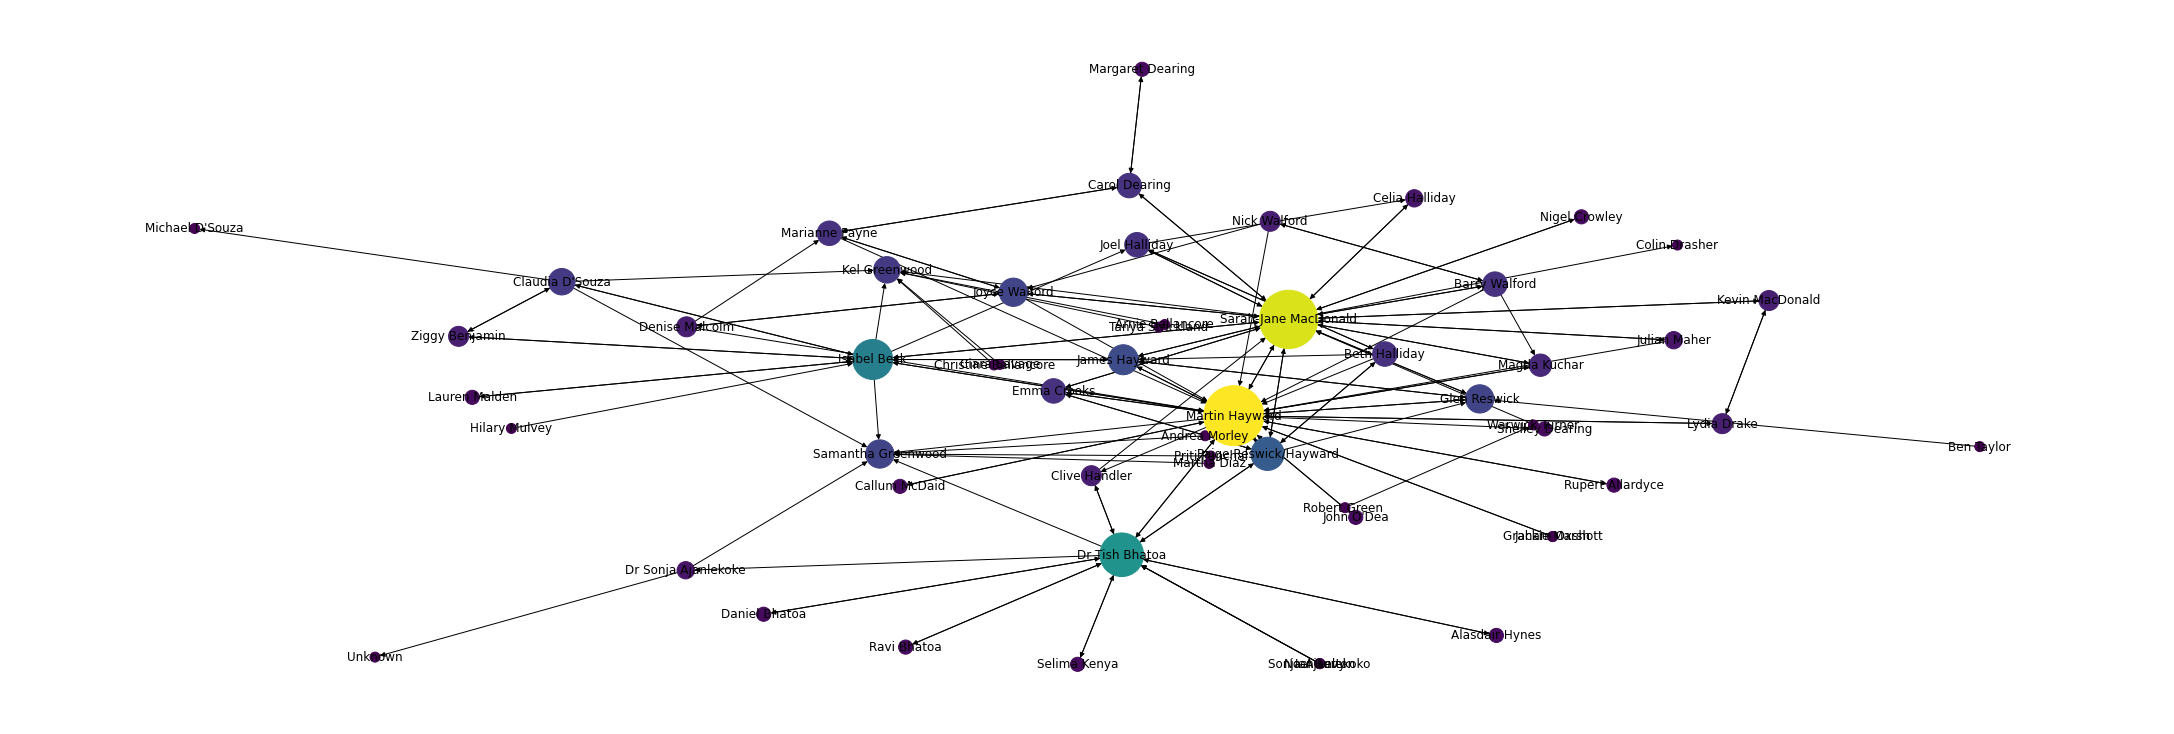

In [22]:
# reshape dataset
emails.dropna(inplace = True)
emails_updated = emails.groupby(["From", "To/CC"]).sum("Number of messages sent").reset_index()

#creat network
correspondance = nx.from_pandas_edgelist(emails_updated, source = "From", target = "To/CC", edge_attr = "Number of messages sent", create_using = nx.DiGraph())

# draw network
plt.figure(figsize = (30,10))
pos = nx.kamada_kawai_layout(correspondance)

node_color = [correspondance.degree(v) for v in correspondance]
node_degree = dict(correspondance.degree)


nx.draw(correspondance, with_labels = True, node_size = [v * 100 for v in node_degree.values()] , node_color=node_color, edge_cmap=plt.cm.Blues, arrows=True, pos=pos)
plt.show()

In [23]:
#draw network
com_net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color= "white",directed=True)
node_degree = dict(correspondance.degree)
nx.set_node_attributes(correspondance, node_degree, "size")
#nx.set_node_attributes(correspondance, communities, "group")
com_net.from_nx(correspondance)
com_net.show("xx.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


This graph enables the user to investigate how much a specific individual communicated to another party. For instance, of the 35 instances of communication previously noted, 16 were from Martin to Dr Bhatoa and 19 were from her to Martin. 

In [24]:
correspondance.get_edge_data('Martin Hayward', "Dr Tish Bhatoa")

{'Number of messages sent': 16.0, 'width': 1}

In [25]:
correspondance.get_edge_data("Dr Tish Bhatoa",'Martin Hayward', )

{'Number of messages sent': 19.0, 'width': 1}

In this network, as a correspondences between third parties (ie those not directly linked with the key individuals are also included, it is not a linked to other parties in the network.) Understanding these aspects can identify possible parties that can be excluded to the investigation. 

In [26]:
nx.is_strongly_connected(correspondance)

False

# Relationship & Communication
Finally the relationship network can also be combined with the non-directed communication graph to highlight not only the relationship between parties but the frequency of communication. This network has been altered by removing the two individuals who appear to be unconnected to the majority of individuals in the graph. 

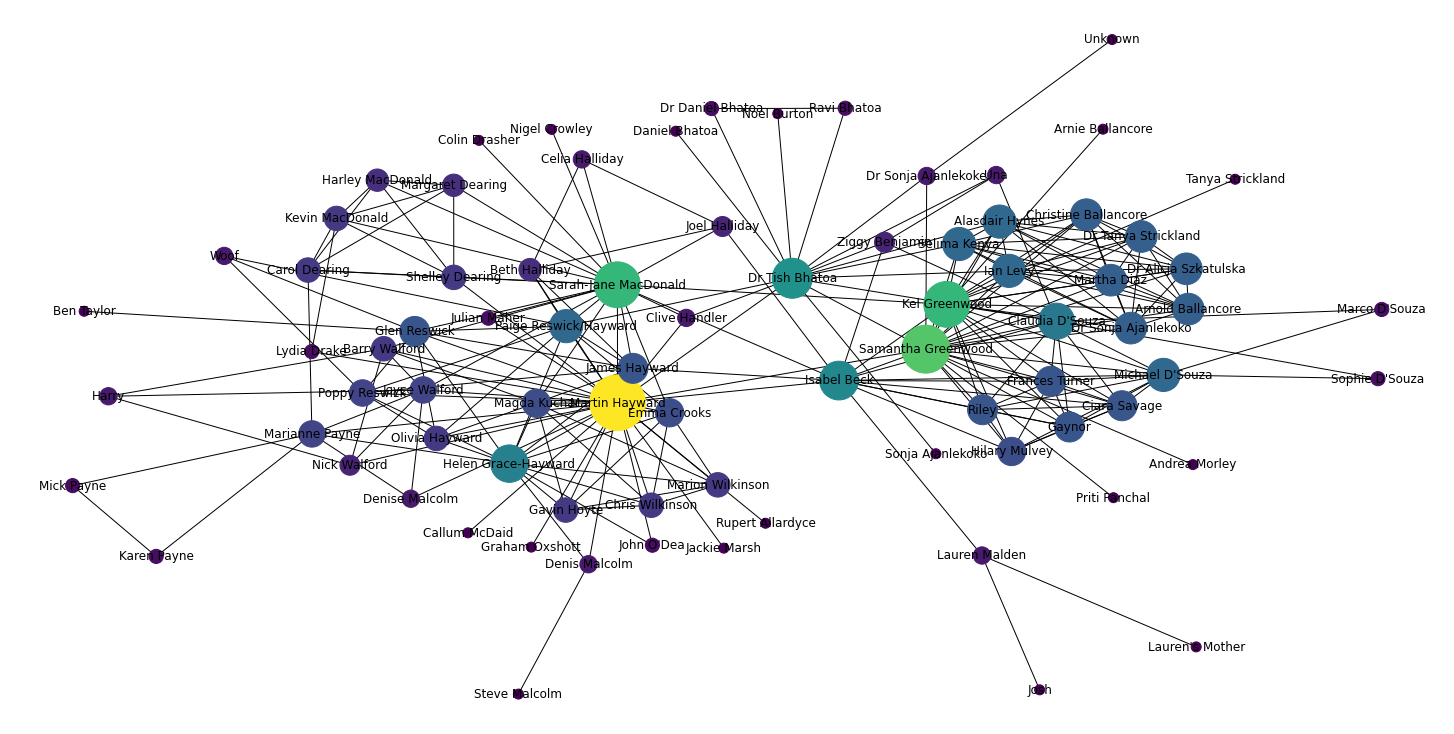

In [27]:
#join networks
G_updated = nx.compose(G, Bonds)

G_updated.remove_node("Robert Green ")
G_updated.remove_node("Warwick Turner")

#draw network
plt.figure(figsize = (20,10))
pos = nx.kamada_kawai_layout(G_updated)

node_color = [G_updated.degree(v) for v in G_updated]
node_degree = dict(G_updated.degree)

nx.draw(G_updated, with_labels = True,  node_size = [v * 100 for v in node_degree.values()] , node_color=node_color, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [28]:
#draw interactive network
net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color= "white", heading = "Murdaugh Network")

node_degree = dict(G_updated.degree)
nx.set_node_attributes(G_updated, node_degree, "size")
color=nx.get_node_attributes(G_updated,'status')
nx.set_node_attributes(G_updated,color, "group")
net.from_nx(G_updated)
net.show("xx.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The graph has a connectivity of 1. Therefore aspects of the network appear to be weak. This weak bond may indicate that individuals may be more willing  to disclose information in questioning as they do not feel indebted to one another. 

In [29]:
nx.edge_connectivity(G_updated)

1

The centrality of some of the key individuals in this network are as follows: 

In [30]:
degCent = nx.degree_centrality(G_updated)
degCent["Martin Hayward"]

0.3875

In [31]:
degCent["Sarah-Jane MacDonald"]


0.2625

In [32]:
degCent["Samantha Greenwood"]

0.28750000000000003

In [33]:
degCent["James Hayward"]

0.1125

In [34]:
degCent["Isabel Beck"]

0.1875

They are all below the 0.5 level and are likely to be due to the number of groups involved and the manner in which different individuals are prominent in different groups. That said, based on closeness centrality, Martin Hayward is a prominent figure with a score of 0.59. In fact the only individual in the sample which had a closeness centrality below 0.5 was James. Therefore these figures can be considered prominent individuals. 

In [35]:
CloseCent = nx.closeness_centrality(G_updated)
CloseCent["Martin Hayward"]

0.5882352941176471

In [36]:
CloseCent["Sarah-Jane MacDonald"]

0.5095541401273885

In [37]:
CloseCent["Samantha Greenwood"]

0.5263157894736842

In [38]:
CloseCent["James Hayward"]

0.4419889502762431

In [39]:
CloseCent["Isabel Beck"]

0.5095541401273885

For those who prefer to   data visually, interactive graphs can be created. This graph can also highlight aspects such as the communities present in the network. These visualisations can further highlight how groups of individuals interact with one another. 

In [40]:
# create interactive graph with community groups
import community as community_louvain

communities = community_louvain.best_partition(G_updated)

btwnCent = nx.betweenness_centrality(G_updated, normalized = True, endpoints = False)

com_net = Network(notebook = True, width = "1000px", height = "700px", bgcolor = "#222222", font_color= "white",)
node_degree = dict(G_updated.degree)
nx.set_node_attributes(G_updated, node_degree, "size")
nx.set_node_attributes(G_updated, communities, "group")
com_net.from_nx(G_updated)
com_net.show("xx.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


# Conclusion
This has been a study examining how social networks could be used in the legal system. As the examples used in this case indicated, networks are likely to serve a useful role in complex matters involving a plethora of parties, affecting a number of victims and/or covering several legal areas. Akin to the project, different networks can be utilised to service the needs of the legal services. 

Furthermore analysis of such networks can also yield additional information concerning the interactions between parties and lines of possible investigation. 

# Additional Notes
This is the first time I have attempted a project such as this, not only using networks but also how it may be utilised in a legal setting. For the mode to be particularly versatile, improvements are required in both constructing the network as well as ensuring that extracting key information is done in a user-friendly manner. As it stands, a similar model will require an individual with knowledge of coding, which is a major limitation in the real life. 

# Additional information about the networks
Below are some additional coding related to analysis of the networks examined in this project. 

In [41]:
nx.average_shortest_path_length(individuals)

3.360662525879917

In [42]:
nx.diameter(individuals)

7

In [43]:
nx.eccentricity(individuals)
# most connected by 6 modes but prices trust which paige interacted is far as others didi not interact with them

{'Martin Hayward': 4,
 'Helen Grace-Hayward': 4,
 'James Hayward': 4,
 'Olivia Hayward': 6,
 'Paige Reswick/Hayward': 6,
 'Glen Reswick': 6,
 'Woof': 6,
 'Poppy Reswick': 6,
 'Sarah-Jane MacDonald': 4,
 'Kevin MacDonald': 6,
 'Harley MacDonald': 6,
 'Margaret Dearing': 6,
 'Carol Dearing': 6,
 'Shelley Dearing': 6,
 'Isabel Beck': 6,
 'Lauren Malden': 6,
 'Josh': 6,
 "Lauren's Mother": 6,
 'Kel Greenwood': 4,
 'Samantha Greenwood': 4,
 'Joyce Walford': 6,
 'Nick Walford': 6,
 'Barry Walford': 6,
 'Harry': 6,
 "John O'Dea": 4,
 'Denis Malcolm': 6,
 'Steve Malcolm': 6,
 'Marianne Payne': 6,
 'Mick Payne': 6,
 'Karen Payne': 6,
 'Joel Halliday': 6,
 'Celia Halliday': 6,
 'Beth Halliday': 6,
 'Jackie Marsh': 4,
 'Magda Kuchar': 6,
 'Emma Crooks': 6,
 'Gavin Hoyte': 6,
 'Chris Wilkinson': 6,
 'Marion Wilkinson': 6,
 'Frances Turner': 6,
 'Gaynor': 6,
 'Riley': 6,
 "Claudia D'Souza": 6,
 "Michael D'Souza": 6,
 "Sophie D'Souza": 6,
 "Marco D'Souza": 6,
 'Hilary Mulvey': 6,
 'Ciara Savage': 6,

In [44]:
nx.node_connectivity(individuals)

1

In [45]:
nx.minimum_node_cut(individuals)

{'The Fairway Players'}

In [46]:
nx.edge_connectivity(individuals)

1

In [47]:
nx.minimum_edge_cut(individuals)

{('The Fairway Players', 'Barry Walford')}

In [48]:
degCent = nx.degree_centrality(Bonds)

In [49]:
degCent["Samantha Greenwood"]

0.29508196721311475

In [50]:
degCent["Martin Hayward"]

0.22950819672131148

In [51]:
CloseCent = nx.closeness_centrality(Bonds)

In [52]:
CloseCent["Samantha Greenwood"]

0.2988943957300801

In [53]:
CloseCent["Martin Hayward"]

0.2414307004470939

In [54]:
T = nx.bfs_tree(Bonds, "Samantha Greenwood")
T.edges()

OutEdgeView([('Samantha Greenwood', 'Kel Greenwood'), ('Samantha Greenwood', "Claudia D'Souza"), ('Samantha Greenwood', 'Dr Sonja Ajanlekoko'), ('Samantha Greenwood', 'Dr Alicja Szkatulska'), ('Samantha Greenwood', 'Isabel Beck'), ('Samantha Greenwood', 'Frances Turner'), ('Samantha Greenwood', 'Gaynor'), ('Samantha Greenwood', 'Riley'), ('Samantha Greenwood', "Michael D'Souza"), ('Samantha Greenwood', 'Hilary Mulvey'), ('Samantha Greenwood', 'Ciara Savage'), ('Samantha Greenwood', 'Arnold Ballancore'), ('Samantha Greenwood', 'Christine Ballancore'), ('Samantha Greenwood', 'Alasdair Hynes'), ('Samantha Greenwood', 'Martha Diaz'), ('Samantha Greenwood', 'Dr Tanya Strickland'), ('Samantha Greenwood', 'Ian Levy'), ('Samantha Greenwood', 'Selima Kenya'), ("Claudia D'Souza", "Sophie D'Souza"), ("Claudia D'Souza", "Marco D'Souza"), ("Claudia D'Souza", 'Dr Tish Bhatoa'), ("Claudia D'Souza", 'Una'), ('Isabel Beck', 'Lauren Malden'), ('Dr Tish Bhatoa', 'Ziggy Benjamin'), ('Dr Tish Bhatoa', 'Rav

In [55]:
nx.average_clustering(G)

0.23814570462167717

In [56]:
nx.transitivity(G)

0.16830294530154277

In [57]:
nx.number_connected_components(G)

2

In [58]:
indegCent = nx.in_degree_centrality(correspondance)

In [59]:
indegCent["Samantha Greenwood"]

0.14285714285714285

In [60]:
indegCent["Martin Hayward"]

0.39285714285714285

In [61]:
outdegCent = nx.out_degree_centrality(correspondance)

In [62]:
outdegCent["Samantha Greenwood"]

0.0

In [63]:
outdegCent["Martin Hayward"]


0.25

In [64]:
nx.minimum_edge_cut(G_updated)

{('Kel Greenwood', 'Tanya Strickland')}

In [65]:
nx.average_shortest_path_length(G_updated)

2.734259259259259

In [66]:
nx.diameter(G_updated)

5

In [67]:
nx.radius(G_updated)

3

In [68]:
nx.eccentricity(G_updated)

{'Alasdair Hynes': 4,
 'Dr Tish Bhatoa': 4,
 'Andrea Morley': 4,
 'Samantha Greenwood': 3,
 'Arnie Ballancore': 5,
 'Kel Greenwood': 4,
 'Barry Walford': 4,
 'Magda Kuchar': 4,
 'Martin Hayward': 3,
 'Nick Walford': 4,
 'Sarah-Jane MacDonald': 4,
 'Ben Taylor': 5,
 'Glen Reswick': 4,
 'Beth Halliday': 4,
 'James Hayward': 4,
 'Joel Halliday': 4,
 'Paige Reswick/Hayward': 4,
 'Callum McDaid': 4,
 'Carol Dearing': 5,
 'Margaret Dearing': 5,
 'Marianne Payne': 4,
 'Celia Halliday': 5,
 'Christine Ballancore': 4,
 'Ciara Savage': 4,
 "Claudia D'Souza": 4,
 'Isabel Beck': 3,
 "Michael D'Souza": 4,
 'Ziggy Benjamin': 4,
 'Clive Handler': 4,
 'Daniel Bhatoa': 5,
 'Denise Malcolm': 4,
 'Joyce Walford': 4,
 'Dr Sonja Ajanlekoke': 4,
 'Unknown': 5,
 'Ravi Bhatoa': 5,
 'Selima Kenya': 4,
 'Emma Crooks': 4,
 'Graham Oxshott': 4,
 'Hilary Mulvey': 4,
 'Ian Levy': 4,
 'Lauren Malden': 4,
 'Jackie Marsh': 4,
 "John O'Dea": 4,
 'Julian Maher': 4,
 'Kevin MacDonald': 5,
 'Lydia Drake': 4,
 'Martha Diaz

In [69]:
nx.periphery(G_updated)

['Arnie Ballancore',
 'Ben Taylor',
 'Carol Dearing',
 'Margaret Dearing',
 'Celia Halliday',
 'Daniel Bhatoa',
 'Unknown',
 'Ravi Bhatoa',
 'Kevin MacDonald',
 'Nigel Crowley',
 'Noel Burton',
 'Colin Drasher',
 'Sonja Ajanlekoko',
 'Tanya Strickland',
 'Woof',
 'Harley MacDonald',
 'Josh',
 "Lauren's Mother",
 'Harry',
 'Steve Malcolm',
 'Mick Payne',
 'Karen Payne',
 "Sophie D'Souza",
 "Marco D'Souza",
 'Dr Daniel Bhatoa']

In [70]:
nx.center(G_updated)

['Samantha Greenwood', 'Martin Hayward', 'Isabel Beck']

In [71]:
nx.minimum_node_cut(G_updated)

{'Samantha Greenwood'}

In [72]:
nx.node_connectivity(G_updated)

1